In [2]:
# python version 3.10.7
# scikit-learn == 1.1.2
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

# Logistic regrssion model:
$$
P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^\top \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}
$$
in the binary choice case. Here, our $x$ is given as the $a_p$'s.

## Plot the coefficients of $a_p$'s

In [3]:
path = r"../data_files/parquet_by_conductors/ecq_B_200_cond_0_123456_one_per_iso.parquet"
df = pd.read_parquet(path)
df.drop(columns=["conductor"], inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
# create train and test sets from df
# shuffle=False
# default test_size=0.25
X = df.drop(columns=['rank']).values
y = df['rank'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [5]:
# demo using SVM model
model_name = 'Logistic Regression'

# create a model
clf = LogisticRegression(max_iter=3000)
# train a svm model for X_train and y_train
clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

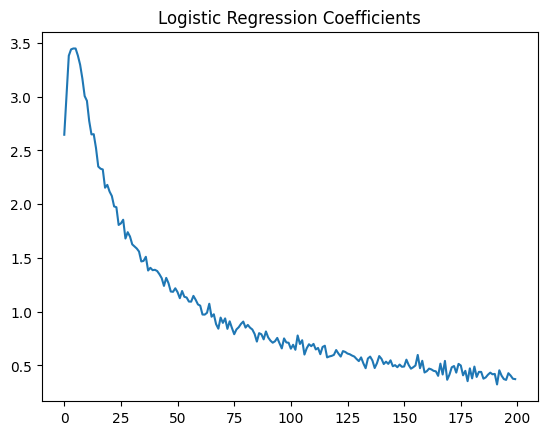

In [15]:
# plot the coefficients of the logistic regression model
plt.plot(clf.coef_[0])
plt.title(f"{model_name} Coefficients")
plt.show()

## Maybe it's a problem of $a_p$ is of different scale despite them being divided by $\sqrt(p)$? Let's make every $a_p$ with empirical distribution with mean 0 std 1 and then plot the coefficients of $a_p$'s

In [17]:
# normalize the data then train test split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [18]:
# train a svm model for X_train and y_train
clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

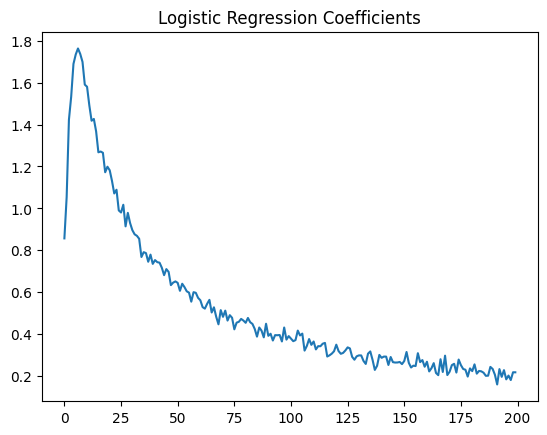

In [19]:
# plot the coefficients of the logistic regression model
plt.plot(clf.coef_[0])
plt.title(f"{model_name} Coefficients")
plt.show()